In [1]:
import pandas as pd
import mysql 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from mysql.connector import Error
import warnings
warnings.simplefilter("ignore")

In [39]:
import mysql.connector as connection

In [50]:
db_connection = connection.connect(host="localhost", database = "sakila",user="root", passwd="Samuel1.",use_pure=True)

query = """select f.film_id, f.title, f.release_year, f.language_id, f.original_language_id, f.rental_duration, f.rental_rate, f.length, f.replacement_cost, f.rating,  r.rental_id, r.rental_date, r.inventory_id, r.customer_id, r.return_date, r.staff_id, 
month(rental_date), month(current_date - 2), year(rental_date), year(current_date),
CASE WHEN month(rental_date) = month(current_date)-2 and year(rental_date) = year(current_date)-17 THEN TRUE ELSE FALSE END rented_last_month
from sakila.film as f 
left join sakila.inventory as i on i.film_id = f.film_id
left join sakila.rental as r on i.inventory_id=r.inventory_id
GROUP BY f.film_id;"""
df = pd.read_sql(query, db_connection)
db_connection.close()



In [51]:
df

,film_id,title,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,...,rental_date,inventory_id,customer_id,return_date,staff_id,month(rental_date),month(current_date - 2),year(rental_date),year(current_date),rented_last_month
0,1,ACADEMY DINOSAUR,2006,1,None,6,0.99,86,20.99,PG,...,2005-07-08 19:03:15,1.0,431.0,2005-07-11 21:29:15,2.0,7.0,11,2005.0,2022,0
1,2,ACE GOLDFINGER,2006,1,None,3,4.99,48,12.99,G,...,2005-08-01 04:24:47,9.0,271.0,2005-08-04 05:36:47,2.0,8.0,11,2005.0,2022,0
2,3,ADAPTATION HOLES,2006,1,None,7,2.99,50,18.99,NC-17,...,2005-07-27 01:21:19,12.0,224.0,2005-07-29 20:33:19,2.0,7.0,11,2005.0,2022,0
3,4,AFFAIR PREJUDICE,2006,1,None,5,2.99,117,26.99,G,...,2005-07-12 02:40:41,16.0,184.0,2005-07-16 04:56:41,1.0,7.0,11,2005.0,2022,0
4,5,AFRICAN EGG,2006,1,None,6,2.99,130,22.99,G,...,2005-05-28 07:53:38,23.0,106.0,2005-06-04 12:45:38,2.0,5.0,11,2005.0,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,2006,1,None,6,0.99,183,9.99,G,...,2005-07-08 23:51:26,4563.0,231.0,2005-07-12 03:21:26,2.0,7.0,11,2005.0,2022,0
996,997,YOUTH KICK,2006,1,None,4,0.99,179,14.99,NC-17,...,2005-07-27 10:21:15,4565.0,324.0,2005-08-03 05:04:15,1.0,7.0,11,2005.0,2022,0
997,998,ZHIVAGO CORE,2006,1,None,6,0.99,105,10.99,NC-17,...,2005-06-17 03:19:20,4567.0,305.0,2005-06-21 00:19:20,1.0,6.0,11,2005.0,2022,0
998,999,ZOOLANDER FICTION,2006,1,None,5,2.99,101,28.99,R,...,2005-07-06 11:40:27,4569.0,37.0,2005-07-14 12:08:27,1.0,7.0,11,2005.0,2022,0


In [52]:
numerical_data=df.select_dtypes(include=np.number)
categorical_data=df.select_dtypes(include='object')

In [53]:
df=pd.merge(categorical_data,numerical_data,left_index=True,right_index=True)
df

,title,original_language_id,rating,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,inventory_id,customer_id,staff_id,month(rental_date),month(current_date - 2),year(rental_date),year(current_date),rented_last_month
0,ACADEMY DINOSAUR,None,PG,1,2006,1,6,0.99,86,20.99,4863.0,1.0,431.0,2.0,7.0,11,2005.0,2022,0
1,ACE GOLDFINGER,None,G,2,2006,1,3,4.99,48,12.99,10310.0,9.0,271.0,2.0,8.0,11,2005.0,2022,0
2,ADAPTATION HOLES,None,NC-17,3,2006,1,7,2.99,50,18.99,6999.0,12.0,224.0,2.0,7.0,11,2005.0,2022,0
3,AFFAIR PREJUDICE,None,G,4,2006,1,5,2.99,117,26.99,6493.0,16.0,184.0,1.0,7.0,11,2005.0,2022,0
4,AFRICAN EGG,None,G,5,2006,1,6,2.99,130,22.99,552.0,23.0,106.0,2.0,5.0,11,2005.0,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,None,G,996,2006,1,6,0.99,183,9.99,4969.0,4563.0,231.0,2.0,7.0,11,2005.0,2022,0
996,YOUTH KICK,None,NC-17,997,2006,1,4,0.99,179,14.99,7240.0,4565.0,324.0,1.0,7.0,11,2005.0,2022,0
997,ZHIVAGO CORE,None,NC-17,998,2006,1,6,0.99,105,10.99,1884.0,4567.0,305.0,1.0,6.0,11,2005.0,2022,0
998,ZOOLANDER FICTION,None,R,999,2006,1,5,2.99,101,28.99,3734.0,4569.0,37.0,1.0,7.0,11,2005.0,2022,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    1000 non-null   object 
 1   original_language_id     0 non-null      object 
 2   rating                   1000 non-null   object 
 3   film_id                  1000 non-null   int64  
 4   release_year             1000 non-null   int64  
 5   language_id              1000 non-null   int64  
 6   rental_duration          1000 non-null   int64  
 7   rental_rate              1000 non-null   float64
 8   length                   1000 non-null   int64  
 9   replacement_cost         1000 non-null   float64
 10  rental_id                958 non-null    float64
 11  inventory_id             958 non-null    float64
 12  customer_id              958 non-null    float64
 13  staff_id                 958 non-null    float64
 14  month(rental_date)       

In [55]:
# Checking the data types of columns of dataframe
df.dtypes

title                       object
original_language_id        object
rating                      object
film_id                      int64
release_year                 int64
language_id                  int64
rental_duration              int64
rental_rate                float64
length                       int64
replacement_cost           float64
rental_id                  float64
inventory_id               float64
customer_id                float64
staff_id                   float64
month(rental_date)         float64
month(current_date - 2)      int64
year(rental_date)          float64
year(current_date)           int64
rented_last_month            int64
dtype: object

In [56]:
df.shape

(1000, 19)

In [57]:
df.columns

Index(['title', 'original_language_id', 'rating', 'film_id', 'release_year',
       'language_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rental_id', 'inventory_id', 'customer_id',
       'staff_id', 'month(rental_date)', 'month(current_date - 2)',
       'year(rental_date)', 'year(current_date)', 'rented_last_month'],
      dtype='object')

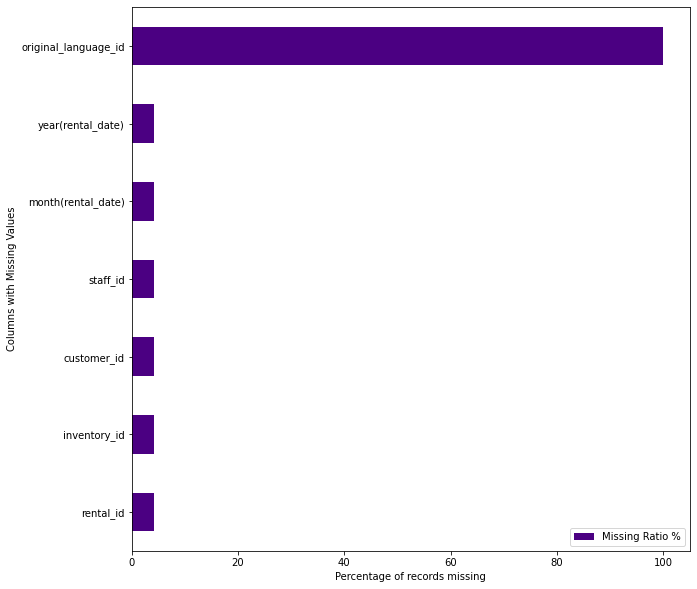

In [58]:
# checking the missing values in variables
df.isnull().sum() 


# creating a function to plot the number of null values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending= True)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", color = "indigo")
        plt.ylabel("Columns with Missing Values", fontsize = 10)
        plt.xlabel("Percentage of records missing", fontsize = 10)
        plt.show()
    else:
        print('No NAs found')
        

plot_nas(df)
plot_width, plot_height = (10, 10)
plt.rcParams['figure.figsize'] = (plot_width, plot_height)


In [59]:
df.isnull().sum()

title                         0
original_language_id       1000
rating                        0
film_id                       0
release_year                  0
language_id                   0
rental_duration               0
rental_rate                   0
length                        0
replacement_cost              0
rental_id                    42
inventory_id                 42
customer_id                  42
staff_id                     42
month(rental_date)           42
month(current_date - 2)       0
year(rental_date)            42
year(current_date)            0
rented_last_month             0
dtype: int64

In [60]:
df.describe()

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,inventory_id,customer_id,staff_id,month(rental_date),month(current_date - 2),year(rental_date),year(current_date),rented_last_month
count,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,958.000000,958.000000,958.000000,958.000000,958.000000,1000.0,958.0,1000.0,1000.0
mean,500.500000,2006.0,1.0,4.985000,2.980000,115.272000,19.984000,4475.885177,2296.699374,294.802714,1.503132,6.384134,11.0,2005.0,2022.0,0.0
std,288.819436,0.0,0.0,1.411654,1.646393,40.426332,6.050833,3393.161538,1317.853616,170.192790,0.500251,0.938350,0.0,0.0,0.0,0.0
min,1.000000,2006.0,1.0,3.000000,0.990000,46.000000,9.990000,6.000000,1.000000,1.000000,1.000000,5.000000,11.0,2005.0,2022.0,0.0
25%,250.750000,2006.0,1.0,4.000000,0.990000,80.000000,14.990000,1315.500000,1159.750000,148.250000,1.000000,6.000000,11.0,2005.0,2022.0,0.0
50%,500.500000,2006.0,1.0,5.000000,2.990000,114.000000,19.990000,3823.500000,2322.000000,292.000000,2.000000,7.000000,11.0,2005.0,2022.0,0.0
75%,750.250000,2006.0,1.0,6.000000,4.990000,149.250000,24.990000,6994.500000,3427.500000,435.750000,2.000000,7.000000,11.0,2005.0,2022.0,0.0
max,1000.000000,2006.0,1.0,7.000000,4.990000,185.000000,29.990000,11486.000000,4574.000000,598.000000,2.000000,8.000000,11.0,2005.0,2022.0,0.0


In [61]:
correlation = df.corr()# checking for the corrrelation
correlation

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,inventory_id,customer_id,staff_id,month(rental_date),month(current_date - 2),year(rental_date),year(current_date),rented_last_month
film_id,1.000000,NaN,NaN,-0.039527,-0.012797,0.049141,-0.049518,-0.006020,0.999959,-0.012759,-0.069617,-0.012262,NaN,NaN,NaN,NaN
release_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rental_duration,-0.039527,NaN,NaN,1.000000,0.025777,0.061586,-0.000831,-0.018124,-0.037835,0.019691,0.030556,-0.010965,NaN,NaN,NaN,NaN
rental_rate,-0.012797,NaN,NaN,0.025777,1.000000,0.029789,-0.044620,0.019874,-0.031091,-0.027659,-0.104193,-0.003653,NaN,NaN,NaN,NaN
length,0.049141,NaN,NaN,0.061586,0.029789,1.000000,0.005605,0.014591,0.051179,-0.012210,-0.028669,0.001746,NaN,NaN,NaN,NaN
replacement_cost,-0.049518,NaN,NaN,-0.000831,-0.044620,0.005605,1.000000,0.065799,-0.055619,0.004890,0.028709,0.080168,NaN,NaN,NaN,NaN
rental_id,-0.006020,NaN,NaN,-0.018124,0.019874,0.014591,0.065799,1.000000,-0.006091,0.011968,-0.013590,0.906478,NaN,NaN,NaN,NaN
inventory_id,0.999959,NaN,NaN,-0.037835,-0.031091,0.051179,-0.055619,-0.006091,1.000000,-0.012919,-0.069395,-0.012630,NaN,NaN,NaN,NaN
customer_id,-0.012759,NaN,NaN,0.019691,-0.027659,-0.012210,0.004890,0.011968,-0.012919,1.000000,0.029506,-0.007579,NaN,NaN,NaN,NaN


In [83]:
# Excluding rows with null values  
df = df[df['year(rental_date)'].notnull()]

In [84]:
df.isnull().sum()

title                        0
original_language_id       958
rating                       0
film_id                      0
release_year                 0
language_id                  0
rental_duration              0
rental_rate                  0
length                       0
replacement_cost             0
rental_id                    0
inventory_id                 0
customer_id                  0
staff_id                     0
month(rental_date)           0
month(current_date - 2)      0
year(rental_date)            0
year(current_date)           0
rented_last_month            0
dtype: int64

<AxesSubplot:>

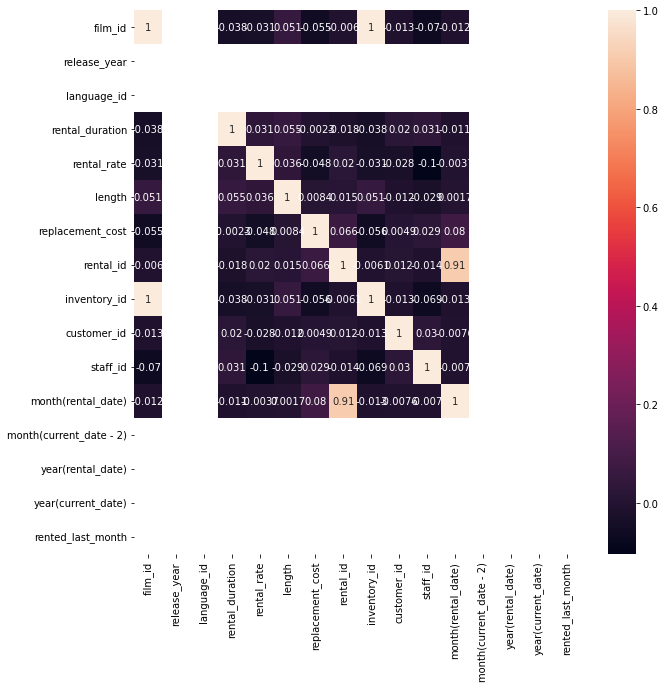

In [96]:
# multicolinearity
correlations_matrix= df.corr()
sns.heatmap(correlations_matrix, annot=True)

In [99]:
y = df

In [100]:
X

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,inventory_id,customer_id,...,title_YENTL IDAHO,title_YOUNG LANGUAGE,title_YOUTH KICK,title_ZHIVAGO CORE,title_ZOOLANDER FICTION,title_ZORRO ARK,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1,2006,1,6,0.99,86,20.99,4863.0,1.0,431.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2006,1,3,4.99,48,12.99,10310.0,9.0,271.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2006,1,7,2.99,50,18.99,6999.0,12.0,224.0,...,0,0,0,0,0,0,1,0,0,0
3,4,2006,1,5,2.99,117,26.99,6493.0,16.0,184.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2006,1,6,2.99,130,22.99,552.0,23.0,106.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2006,1,6,0.99,183,9.99,4969.0,4563.0,231.0,...,0,1,0,0,0,0,0,0,0,0
996,997,2006,1,4,0.99,179,14.99,7240.0,4565.0,324.0,...,0,0,1,0,0,0,1,0,0,0
997,998,2006,1,6,0.99,105,10.99,1884.0,4567.0,305.0,...,0,0,0,1,0,0,1,0,0,0
998,999,2006,1,5,2.99,101,28.99,3734.0,4569.0,37.0,...,0,0,0,0,1,0,0,0,0,1


In [109]:
y = df(rental_duration)

TypeError: 'DataFrame' object is not callable

In [102]:
#TRAIN SPLIT

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
# Dummification 
X = pd.get_dummies(X, drop_first = True)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state=42)

In [106]:
X

,film_id,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rental_id,inventory_id,customer_id,...,title_YENTL IDAHO,title_YOUNG LANGUAGE,title_YOUTH KICK,title_ZHIVAGO CORE,title_ZOOLANDER FICTION,title_ZORRO ARK,rating_NC-17,rating_PG,rating_PG-13,rating_R
0,1,2006,1,6,0.99,86,20.99,4863.0,1.0,431.0,...,0,0,0,0,0,0,0,1,0,0
1,2,2006,1,3,4.99,48,12.99,10310.0,9.0,271.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2006,1,7,2.99,50,18.99,6999.0,12.0,224.0,...,0,0,0,0,0,0,1,0,0,0
3,4,2006,1,5,2.99,117,26.99,6493.0,16.0,184.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2006,1,6,2.99,130,22.99,552.0,23.0,106.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2006,1,6,0.99,183,9.99,4969.0,4563.0,231.0,...,0,1,0,0,0,0,0,0,0,0
996,997,2006,1,4,0.99,179,14.99,7240.0,4565.0,324.0,...,0,0,1,0,0,0,1,0,0,0
997,998,2006,1,6,0.99,105,10.99,1884.0,4567.0,305.0,...,0,0,0,1,0,0,1,0,0,0
998,999,2006,1,5,2.99,101,28.99,3734.0,4569.0,37.0,...,0,0,0,0,1,0,0,0,0,1


In [107]:
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test) # coundnt do the Train split because the 

ValueError: y should be a 1d array, got an array of shape (622, 19) instead.

In [98]:
scaler = StandardScaler()
reg =  LinearRegression()   


X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)       
reg.fit(X_train, y_train)

LinearRegression()

In [98]:
print("Train Score : {}".format(logreg.score(X_train, y_train)))
print('Test Score : {}'.format(logreg.score(X_test, y_test))) 

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
#the dataset is not recommended. i couldnt even do logistic regression because there are too many NAN